

# ASTR 21100 

# "Computational Techniques in Astrophysics"

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

#### Teaching Assistants: 
#### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
#### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

In [1]:
import numpy as np

In [38]:
# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
# reusing my codes from the repository
from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

### Interpolation in more than one dimension

That is interpolation of a function in more than variable: $f(x, y,\ldots)$. For example, $d_L(\Omega_{\rm m0},\Omega_\Lambda)$. 

In general, I will denote a function of many parameters as $f(\mathbf{x})$, where $\mathbf{x}=x_0,x_1,\ldots,x_N$. Note that the function itself can produce multiple values for a given $\mathbf{x}$ (i.e., $f$ in general can be a vector). 



### Multivariate polynomial interpolation

Two-dimensional polynomial of degree $N$:

$$p_N(x,y) = \sum\limits_{i=0}^N\sum\limits_{j=0}^N a_{ij}x^i y^j.$$

For example, quadratic 2D polynomial is 

$$p_2(x,y) = a_{00} + a_{01}y + a_{02}y^2 + a_{10}x + a_{20}x^2 + a_{11}xy + a_{12}xy^2+a_{21}x^2y + a_{22}x^2y^2.$$

The same approach, we need to have function values at $(N+1)^2$ training points to solve for $(N+1)^2$ $a_{ij}$ coefficients. 

Computation of the $a_{ij}$ coefficients for interpolating polynomial of degree $N$ is demonstrated in a code in exercise 2 in homework 2). 

An example of application of the polynomial interpolation is in numerical solution of the *partial differential equations* (PDEs). 

For example, consider Poisson equation in 1D for potential $\Phi(x)$:

$$\nabla^2\Phi=\frac{\partial^2 \Phi}{\partial x^2} = \rho(x),$$

or in 2D for potential $\Phi(x,y)$ given the density field $\rho(x,y)$: 

$$\nabla^2\Phi=\frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial y^2}=\rho(x,y).$$ 

* We can approximate $\nabla^2\Phi$ by a polynomial of sufficiently large order for the domain. 

* We can then solve for its coefficients given some sufficient number of tabulated values of $\rho(x)$. 

* $\Phi$ can be reconstructed from the polynomial approximation of $\nabla^2\Phi$, once the coefficients are computed. 

Such approach forms the basis of the *collocation methods* for solving Poisson equation (and, more generally, the class of elliptic PDEs). 

### Multivariate spline interpolation 

Like in 1D, multivariate splines are constructed using piecewise low-order polynomials with coefficients constrained to maintain continuity of the spline derivatives of up to some order. 

Let's take a look at the routines available for multi-dimensional interpolation in <a href="https://docs.scipy.org/doc/scipy/reference/interpolate.html">scipy.interpolate</a>

### Spline interpolation in 2D

Several routines for spline interpolation, but only in 2D (some of the useful "high-level" routines): 

* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d"><tt>interp2d</tt></a> - 2d spline interpolation with an interface similar to <tt>interp1d</tt>. 

* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.SmoothBivariateSpline.html#scipy.interpolate.SmoothBivariateSpline"><tt>SmoothBivariateSpline</tt></a> - 2d spline with a possibility of choosing smoothing parameter <tt>s</tt>, similarly to <tt>UnivariateSpline</tt>.

* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LSQBivariateSpline.html#scipy.interpolate.LSQBivariateSpline"><tt>LSQBivariateSpline</tt></a> - least squares regression with splines in 2D. 


### Interpolation in more than two dimensions

Why so few routines are available for this in <a href="https://docs.scipy.org/doc/scipy/reference/interpolate.html">scipy.interpolate</a> package?

For larger number of dimensions  arrays and the number of computations becomes larger, matrices can become poorly conditioned sooner (e.g., it’s difficult to go beyond 8-10 order polynomial interpolation in 2D). 

This limits useful methods to simpler ones, such as the RBF or piecewise constant or piecewise linear interpolation. 

### A visual example: reconstruction of an image corrupted by cosmic rays

Consider an image in which useful information in some random fraction of pixels is lost for some reason (in real observations this can happen when a charged particle, called cosmic ray, hits a pixel). We want to use good pixels to reconstruct the values in the damaged pixels. 

This is a toy example, but nevertheless is quite realistic. Real astronomical images are taken using CCDs (similar to devices used in digital cameras, such as in your phone, but larger and more sensitive and less noisy). Cosmic rays - charged particles that stream about constantly, can hit a pixel in a CCD and destroy any useful information accumulated in it. If exposed for a large time to a high flux of cosmic rays, CCD image will have many bad pixels. We can attempt to use good pixels to repair (or reconstruct) values in the pixels affected by the cosmic rays.  

In [102]:
from scipy.interpolate import griddata

indsall = np.argwhere(image_cr>=0) # we will interpolate to all pixels
dummy = griddata(inds, train_vals, indsall, method='linear')

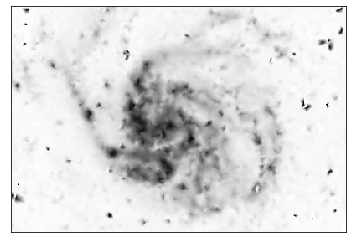

In [103]:
show_image(dummy.reshape(nxp,nyp), figsize=6)

### Radial Basis Function (RBF) interpolation

Implemented in <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html#scipy.interpolate.Rbf"><tt>scipy.interpolate.Rbf</tt></a>

### but before I talk about RBF interpolation

I wanted to bring back the barycentric Lagrange interpolation formula I showed on Wednesday: 

$$
f(x)\approx L_N(x) = \frac{\sum\limits_{i=0}^{N} f(x_i)\,\frac{w_i}{x-x_i}}{\sum\limits_{i=0}^{N} \frac{w_i}{x-x_i}},
$$

where *barycentric weights* $w_i$ can be computed for arbitrary choice of $\{x_i\}$ or have known expressions (evenly spaced points, Chebyshev nodes). 

Note that $w_i/(x-x_i)$ can be viewed as effective weights with which we compute "average" value of $f(x)$. The weight is smaller for training points that are "farther" away from $x$ (i.e. larger $x-x_i$). 


In one dimension RBF approximation is expansion in the *radial basis function* set: 
$$f(x)\approx \sum\limits_{k=0}^{m} a_k\psi_k(x) $$ 

where function $\psi_k(x)=\phi(\vert x-x_k\vert)$ and $\phi$ is the same function for all $k$, which depends on the distance (or radius) of point $x$ from point $x_k$: $\vert x-x_k\vert$.

if we have $N=m+1$ training points $x_k$ with corresponding function values $f_k = f(x_k)$, we can solve the linear system of $m+1$ equations

\begin{eqnarray}
f_0 &=& \sum\limits_{k=0}^{m} a_k\phi(\vert x_0-x_k\vert)\\
f_1 &=& \sum\limits_{k=0}^{m} a_k\phi(\vert x_1-x_k\vert)\\
\dots &\ldots& \ldots\\
f_m &=& \sum\limits_{k=0}^{m} a_k\phi(\vert x_m-x_k\vert)
\end{eqnarray}

for $m+1$ $a_k$ values that match these $f_k$ values to machine precision.

In $D$ dimensions is similar expression except $x$'s are replaced by $D$-dimensional vectors, $\mathbf{x}$ and distance is replaced by the $D$-dimensional distance $r_k=\|\mathbf{x}-\mathbf{x}_k\|$:

$$f(\mathbf{x})=\sum\limits_{k=0}^{m} a_k\phi(r_k).$$ 


| Number of dimensions |     Expression for distance  |
|----------------|-------------------------------|
| $D=1$    |  $$r_k = \vert x-x_k\vert$$ |
| $D=2$    |  $$r_k=[(x-x_k)^2+(y-y_k)^2]^{1/2}$$ |
| $D=3$    |  $$r_k=[(x-x_k)^2+(y-y_k)^2+(z-z_k)^2]^{1/2}$$|

### Commonly used radial basis functions

|RBF Name                  |Function                                         |  Comment        |
|-----------------------|-------------------------------------------------|--------------------------|
|Multiquadric         |     $$\phi(r)=[1+(r/\epsilon)^2]^{1/2}$$    | Most common     |
|Inverse multiquadric | $$\phi(r)=[1+(r/\epsilon)^2]^{-1/2}$$ | Performs better than quadratic for some functions |
|Gaussian               | $$\phi(r) = \exp\left[-\frac{1}{2}\left(\frac{r}{\epsilon}\right)^2\right]$$ | Goes to zero quickly, sometimes possible to get high-resolution and good results. |
| Polyharmonic splines | $$\phi(r) = r^{2k-1}$$| where  $k>0$  is integer  |



### Toy example with possible application of RBF interpolation

Image with random damaged pixels (e.g., by cosmic rays) reconstructed using RBF.

In [4]:
# we use scikit-image package 
from skimage import io

# read in RGB image of M101 - "the Pinwheel galaxy"
image = io.imread('img/m101_nasa.jpg')
# image size
nxp, nyp = image.shape[0], image.shape[1]
print("image size %d x %d pixels; pixel data type is %s"%(nxp, nyp, image.dtype))



image size 270 x 400 pixels; pixel data type is uint8


In [3]:
def show_image(img, cmap='Greys', auto_aspect=False, figsize=4):
    fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img,  cmap='Greys')
    if auto_aspect:
        ax.set_aspect('auto')
    plt.show()

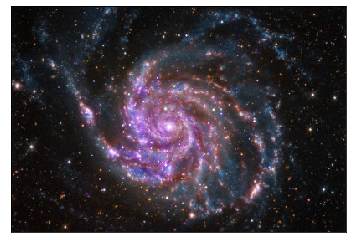

In [15]:
show_image(image, figsize=6)

In [6]:
# make a copy of one of the channels for experimentation
image_cr = np.copy(image[:,:,2])

# clip pixel values to the range of [0-254]
image_cr = np.clip(image_cr, 0, 254)

In [7]:

# corrupting a fraction of pixels fcr by "cosmic rays"
fcr = 0.9
xr = np.random.uniform(size=np.size(image_cr))

# hit every fcr-th pixel randomly with a "cosmic ray"
for i in range(nxp):
    for j in range(nyp):
        ind = i*nxp + j
        if xr[ind] > 1.-fcr:
            image_cr[i,j] = 255 

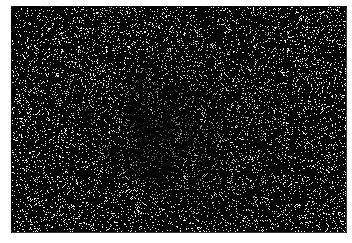

In [8]:
show_image(image_cr, figsize=6)

In [9]:
# find indices of good pixels
inds = np.argwhere(image_cr <= 254)
# find indices of bad pixels affected by cosmic rays
inds2 = np.argwhere(image_cr == 255)

In [10]:
# we will use good pixels as the training sample for RBF interpolation
# training values
train_vals = image_cr[inds[:,0],inds[:,1]]
# training pixel indices
xtrain, ytrain = inds[:,0], inds[:,1]

In [11]:
from scipy.interpolate import Rbf

# initialize RBF interpolation object
rbf = Rbf(xtrain, ytrain, train_vals, function='inverse')

In [16]:
# interpolate 
image_cr[inds2[:,0], inds2[:,1]] = rbf(inds2[:,0], inds2[:,1])

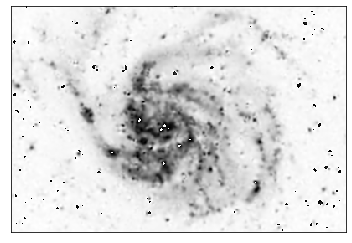

In [17]:
show_image(image_cr, figsize=6)

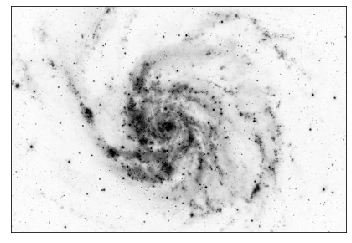

In [18]:
# original image
show_image(image[:,:,2], figsize=6);

### RBF interpolation is expensive 

It takes $O(N^3_{\rm train})$ operations to compute coefficients for $N_{\rm train}$ training points and then $O(N_{\rm test})$ operations to compute approximate function at the test points. 

RBF constructs approximation that can be evaluated at any $x$. 

However, in practice one often faces a more limited need to interpolate values from non-evenly distributed points to points on an evenly spaced grid. 

For example, in the image exactly, the distribution of "good" pixels is random, but we want to reconstruct image on regular pixel grid. This problem is simpler and is handled either by the local (piecewise) linear or low-polynomial order interpolation

### Piecewise linear interpolation in many dimensions

Scipy routines
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata"><tt>griddata</tt>,  <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator"><tt>LinearNDInterpolator</tt></a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interpn.html#scipy.interpolate.interpn"><tt>interpn</tt></a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html#scipy.interpolate.RegularGridInterpolator"><tt>RegularGridInterpolator</tt></a>.

### Reminder: piecewise linear interpolation in 1D 

Linear interpolation for the point $x$ located between "training points" $x_i$ and $x_{i+1}$ ($x_i\leq x\leq x_{i+1}$) at which function values are $f_i$ and $f_{i+1}$ is 

$$f(x)\approx f_i + \frac{f_{i+1}-f_{i}}{x_{i+1}-x_i}\, (x-x_i) = \frac{f_i(x_{i+1}-x_i)+f_{i+1}(x-x_i)}{x_{i+1}-x_i} = f_i\,\left(1-\frac{x-x_i}{x_{i+1}-x_i}\right)+f_{i+1}\,\frac{x-x_i}{x_{i+1}-x_i}.$$

or 

$$f(x) \approx (1-w)\, f_i  + w\,f_{i+1};\ \ \ \ \ \ w=\frac{x-x_i}{x_{i+1}-x_i}.$$

We can imagine an opposite problem of linearly interpolating $f(x)$ at $x$ to the neighboring grid points. The interpolation would have the same weights: 

$$f_i = f_i + (1-w)f(x);\ \ \ \ \ f_{i+1}=f_{i+1} + w\,f(x)$$

### Linear interpolation from the function values at evenly spaced grid of points

Suppose we have a grid of evenly spaced points covering a rectangular 2-dimensional $x-y$ domain, $x_i$ and $y_i$ where $i,j=0,\ldots, N-1$,  and function values tabulated at the grid nodes: $f_{ij} = f(x_i, x_j)$. 

A piecewise linear interpolation from the function values at grid points to a given point $(x,y)$ uses a 2D linear polynomial to approximate the function within the vicinity of that point.  

To find the 4 coefficients $a_{00}$, $a_{10}$, $a_{01}$, $a_{11}$ of the local approximating polynomial, we need 4 function values: these are taken to be the function values at the grid points closest to the point $(x,y)$. We can think of the grid of points as forming a grid of rectangular cells with side length equal to the spacing of grid points in each axis, with each grid point located in the center of each of such "cells". 

<img width=300 src="img/cic_schema.png"></img>

Suppose the point $(x,y)$ is closest to the grid point $(x_i,y_j)$ and the 4 nearest cells are cells around grid points $(x_{i},y_j)$, $x_{i+1},y_j)$, $(x_{i},y_{j+1})$, $(x_{i+1}, y_{j+1})$. For convenience and illustration, we will consider grid that has equal spacings in $x$- and $y$-directions: $x_{i+1}-x_i = y_{j+1}-y_j = h$.  

To derive the coefficients of $p_1(x,y)$ we will also rescale coordinates as follows $x\rightarrow x=(x-x_i)/h$, $y\rightarrow y=(y-y_j)/h$. The rescaled $x$ and $y$ now lie within the range $[0,1]$ in this problem. 

A piecewise 2D linear interpolation polynomial to approximate the function around $(x,y)$ then is: 

$$f(x,y)\approx p_{1}(x,y) = a_{00} + a_{10}x + a_{01}y + a_{11} xy.$$

Using 4 function values at the nearest grid points, $f_{i,j}$, $f_{i+1,j}$, $f_{i,j+1}$, $f_{i+1,j+1}$, we can solve for the coefficients. 

In the rescaled variables $(x,y)=(0,0)$ corresponds to $(x_i,y_j)$ and so we immediately have $a_{00}=f(x_i,y_j)=f_{ij}$. 
Likewise, $(x,y)=(0,1)$ corresponds to $(x_i,y_{j+1})$, so $a_{00} +a_{01} = f_{i,j+1}$ or $a_{01}=f_{i,j+1}-f_{ij}$. 
Likewise, for $(x,y)=(1,0)$, $a_{00} + a_{10} = f_{i+1,j}$ and $a_{10} = f_{i+1,j}-f_{ij}$. And, finally, for $(x,y)=(1,1)$: 
$a_{00} + a_{10} + a_{01} + a_{11} = f_{i+1,j+1}$ and 

$$a_{11} = f_{i+1,j+1}- f_{i+1,j}+f_{i,j}-f_{i,j+1}+f_{i,j} -f_{i,j} = 
f_{i+1,j+1}- f_{i+1,j}-f_{i,j+1}+f_{i,j}.$$

Substituting the coefficients bac into the equation for polynomial we have 

$$p_{1}(x,y) = f_{i,j} + (f_{i+1,j}-f_{i,j})\,x + (f_{i,j+1}-f_{i,j})\,y + (f_{i+1,j+1}- f_{i+1,j}-f_{i,j+1}+f_{i,j}) xy.$$

We can rewrite this by collecting the same grid function values in the same term: 

$$p_1(x,y) = (1 -x)(1-y)\,f_{i,j} + (1-y)x\,f_{i+1,j} + (1-x)y\,f_{i,j+1} + xy\,f_{i+1,j+1}.$$ 

This equation provides expression for piecewise linear interpolation in 2D. 



$$p_1(x,y) = (1 -x)(1-y)\,f_{i,j} + (1-y)x\,f_{i+1,j} + (1-x)y\,f_{i,j+1} + xy\,f_{i+1,j+1}.$$ 

### Geometric interpretation

The value of the function $f(x,y)$ is approximated as a weighted sum of function values of the nearest four grid points, $f_{i,j}$, $f_{i+1,j}$, $f_{i,j+1}$, $f_{i+1,j+1}$, with weights $w_{i,j}=(1-x)(1-y);$ $w_{i+1,j}=(1-y)x;$ $w_{i,j+1}=(1-x)y;$ $w_{i+1,j+1}=xy$. 

If we imagine a cell centered on $(x,y)$ of the same size as grid cells, the weights correspond to the fraction of the area of that cell overlapping with each of the four cells. 


<img width=300 src="img/cic_schema.png"></img>

### Expression for the weights 

To compute the weights using original (not rescaled) values of $x$ and $y$ we substitute rescaling expressions, $x=(x-x_i)/h$, $y=(y-y_j)/h$, back into the equations for weights: 

\begin{eqnarray}
w_{i,j} &=& \left(1-\frac{x-x_i}{h}\right)\,\left(1-\frac{y-y_j}{h}\right)\\
w_{i+1,j} &=& \frac{x-x_i}{h}\,\left(1-\frac{y-y_j}{h}\right)\\
w_{i,j+1} &=& \frac{y-y_j}{h}\,\left(1-\frac{x-x_i}{h}\right)\\
w_{i+1,j+1} &=& \frac{x-x_i}{h}\,\frac{y-y_j}{h}
\end{eqnarray}

Such interpolation is used in simulations of $N$-body systems in the <a href="https://en.wikipedia.org/wiki/Particle_Mesh">Particle Mesh</a> (PM) codes and Particle-in-Cell (PIC) codes for simulations of particle dynamics in plasma. 

A related approach is to interpolate mass or charge of particles onto neighboring grid cells in such codes is called Cloud-in-Cell (CIC) method. The most commonly used interpolation here is also linear. 

### Linear interpolation from randomly spaced points onto evenly spaced grid points

If we face the opposite task of interpolating from randomly spaced training points to the points on evenly spaced grid, we can reuse the above result and carry out linear interpolation by assigning each of the nearest grid points the value of the function at the random point with the corresponding weight:

Each random points adds a contribution to each of the 4 nearest cells as follows
\begin{eqnarray}
f_{i,j} & = & f_{i,j} &+& f(x, y)\, w_{i,j}; \\ 
f_{i+1,j}  &=&  f_{i+1,j} &+& f(x, y)\, w_{i+1,j};\nonumber \\
f_{i,j+1} & = & f_{i,j+1} &+& f(x, y)\, w_{i,j+1};\\
f_{i+1,j+1} & =&  f_{i+1,j+1} &+& f(x, y)\, w_{i+1,j+1};\nonumber \\
\end{eqnarray}

### Piecewise linear interpolation in 3D

Similar expressions can be derived for interpolation in 3D. 

\begin{eqnarray}
f_{i,j,k} & = & f_{i,j,k} + f(x_p, y_p)\, w_{i,j,k}; \ \ 
f_{i+1,j,k}  =  f_{i+1,j,k} + f(x_p, y_p)\, w_{i+1,j,k};\nonumber \\
f_{i,j+1,k} & = & f_{i,j+1,k} + f(x_p, y_p)\, w_{i,j+1,k};\ \
f_{i+1,j+1,k}  =  f_{i+1,j+1,k} + f(x_p, y_p)\, w_{i+1,j+1,k};\nonumber \\
f_{i,j,k+1} & = & f_{i,j,k+1} + f(x_p, y_p)\, w_{i,j,k+1};\ \
f_{i+1,j,k+1}  =  f_{i+1,j,k+1} + f(x_p, y_p)\, w_{i+1,j,k+1};\nonumber \\
f_{i,j+1,k+1} & = & f_{i,j+1,k+1} + f(x_p, y_p)\, w_{i,j+1,k+1};\ \
f_{i+1,j+1,k+1}  =  f_{i+1,j+1,k+1} + f(x_p, y_p)\, w_{i+1,j+1,k+1};\nonumber,
\end{eqnarray}

where

\begin{eqnarray}
w_{i,j,k} &=& \left(1-\frac{x-x_i}{h}\right)\,\left(1-\frac{y-y_j}{h}\right)\,\left(1-\frac{z-z_k}{h}\right)\\
w_{i+1,j,k} &=& \frac{x-x_i}{h}\,\left(1-\frac{y-y_j}{h}\right)\,\left(1-\frac{z-z_k}{h}\right)\\
w_{i,j+1,k} &=& \frac{y-y_j}{h}\,\left(1-\frac{x-x_i}{h}\right)\,\left(1-\frac{z-z_k}{h}\right)\\
w_{i+1,j+1,k} &=& \frac{x-x_i}{h}\,\frac{y-y_j}{h}\,\left(1-\frac{z-z_k}{h}\right)\\
w_{i,j,k+1} &=& \left(1-\frac{x-x_i}{h}\right)\,\left(1-\frac{y-y_j}{h}\right)\,\frac{z-z_k}{h}\\
w_{i+1,j,k+1} &=& \frac{x-x_i}{h}\,\left(1-\frac{y-y_j}{h}\right)\,\frac{z-z_k}{h}\\
w_{i,j+1,k+1} &=& \frac{y-y_j}{h}\,\left(1-\frac{x-x_i}{h}\right)\,\frac{z-z_k}{h}\\
w_{i+1,j+1,k+1} &=& \frac{x-x_i}{h}\,\frac{y-y_j}{h}\,\frac{z-z_k}{h}\\
\end{eqnarray}

and in larger number of dimensions. 

### Histograms

In fact, piecwise (constant) interpolation is exactly done when one constructs a *histogram*, which is interpolation using a "nearest point" method. 

In [54]:
def plot_histogram(data, bins=None, xlabel=' ', ylabel=' ', 
                   figsize=3.):
    "helper routine to histogram values in vector data"
    fig = plt.figure(figsize=(figsize, figsize)) # define figure environment
    plt.xlabel(xlabel); plt.ylabel(ylabel) # define axis labels
    
    # plot histogram of values in data
    plt.hist(data, bins=bins, histtype='stepfilled', 
             facecolor='slateblue', alpha=0.5)
    
    # this line is not stictly needed for plotting histogram
    # it plots individual values in data as little ticks along x-axis
    plt.plot(data, np.full_like(data, data.max()*0.1), '|k', 
             markeredgewidth=1)
    plt.show()

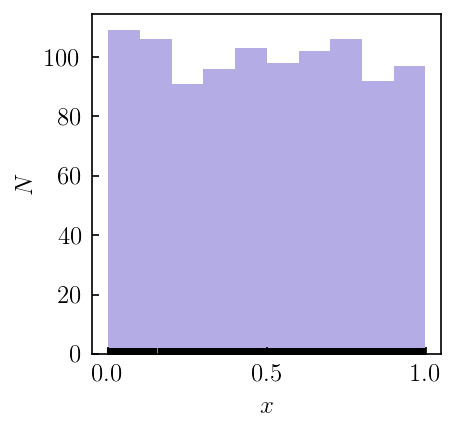

In [56]:
xrnd = np.random.uniform(size=1000)

plot_histogram(xrnd, xlabel='$x$', ylabel='$N$', bins=10)

Let's look at a histogram of something more meaningful: distribution of "metallicity" parameter that measures abundance of elements heavier than Lithium in stars belonging to <a href="https://en.wikipedia.org/wiki/Globular_cluster">globular clusters</a> orbiting our Milky Way galaxy using <a href="https://www.physics.mcmaster.ca/~harris/mwgc.dat">catalog of Milky Way's globular clusters</a> maintained by William Harris of McMaster University.

In [57]:
ZGCs = np.loadtxt('data/gcz.dat', usecols=(1), unpack=True)
            

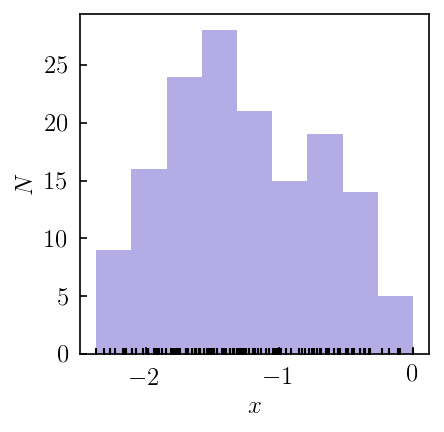

In [60]:
# specify the number of bins below; experiment with different number of bins
# and choose the number that you consider to be the best
nbins = 
plot_histogram(ZGCs, xlabel='$x$', ylabel='$N$', bins=nbins)

Use example above to plot histogram of ZGCs values for globular clusters. Experiment with using different number of bins (<tt>nbins</tt> parameter in the example above). Choose the number of bins that you think are appropriate for this plot.  

Report the number of bins you decided to use in this <a href="https://forms.gle/Jn6NkrVJbzRs7DNZ7">google form</a>